In [70]:
# résolution de l'EDP de Black-Scholes par différences finies

# librairies
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import time

In [3]:
# paramètres financiers
S0 = 247.12
r = 0.035
sigma = 0.2
T = 2.
K = 269.99

In [116]:
# paramètres numériques
N = 1000 # nb de points en prix
M = 100000 # nb de points en temps
Smax = 1000 # prix maximum pour la résolution
dt = T/M
ds = Smax/N
print("Les pas de temps et prix sont:",dt,ds)

Les pas de temps et prix sont: 2e-05 1.0


In [83]:
# initialisation de la matrice C (valeurs de l'option)
C = np.zeros((M+1,N+1))
# tableau des prix S
S = ds*np.arange(N+1)
# tableau des temps t
t = dt*np.arange(M+1)
# prix finaux t=T
C[M,:] = np.maximum(S-K,0)
# conditions aux bords en prix
C[:,0] = 0.
C[:,N] = Smax-K*np.exp(-r*(T-t))

In [84]:
C

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 748.26299256],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 748.08671497],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 747.91031394],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 730.38772153],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        , 730.19892687],
       [  0.        ,   0.        ,   0.        , ..., 729.81      ,
        729.91      , 730.01      ]])

In [85]:
# matrice du système linéaire (qui ne dépend pas du temps)
#A = np.zeros((N-1,N-1))
A = np.diag(-1/dt - (sigma**2/ds**2)*S[1:N]**2 - r*S[1:N]/ds - r) \
   +np.diag(0.5*(sigma/ds)**2*S[1:N-1]**2 + r/ds*S[1:N-1],1) \
   +np.diag(0.5*(sigma/ds)**2*S[2:N]**2,-1)

In [96]:
# on lance le chronomètre
start = time.time()
# boucle en temps 
for i in range(M-1,-1,-1):
    # vecteur du second membre
    b = -1/dt*C[i+1,1:N]
    # ajout des conditions aux bords
    b[0] += -0.5*(sigma/ds)**2*S[1]**2*C[i,0]
    b[N-2] += (-0.5*(sigma/ds)**2*S[N-1]**2 - r/ds*S[N-1])*C[i,N]
    # résolution du système Ax=b
    C[i,1:N] = np.linalg.solve(A,b)
end = time.time()
print(end-start)

ValueError: solve1: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (m,m),(m)->(m) (size 99 is different from 9999)

In [66]:
# valeur de l'option à l'instant 0 (à la signature) pour différents prix d'actif
C[0,:]

array([0.00000000e+00, 1.30809779e-36, 4.15422150e-34, ...,
       7.46262929e+02, 7.47262961e+02, 7.48262993e+02])

In [117]:
# valeur exacte de la solution
C0exact = S*norm.cdf((np.log(S/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))) \
          -K*np.exp(-r*T)*norm.cdf((np.log(S/K)+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T)))

<ipython-input-117-8670d0f038d3>:2: RuntimeWarning: divide by zero encountered in log
  C0exact = S*norm.cdf((np.log(S/K)+(r+0.5*sigma**2)*T)/(sigma*np.sqrt(T))) \
<ipython-input-117-8670d0f038d3>:3: RuntimeWarning: divide by zero encountered in log
  -K*np.exp(-r*T)*norm.cdf((np.log(S/K)+(r-0.5*sigma**2)*T)/(sigma*np.sqrt(T)))


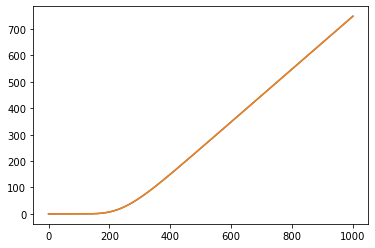

In [68]:
plt.plot(S,C[0,:])
plt.plot(S,C0exact)

In [69]:
max(abs(C[0,:]-C0exact))

0.04800842790360349

In [22]:
C0exact

array([0.00000000e+00, 6.48580256e-03, 7.40622057e+00, 6.08810806e+01,
       1.50158536e+02, 2.48513135e+02, 3.48295354e+02, 4.48267308e+02,
       5.48263599e+02, 6.48263083e+02, 7.48263007e+02])

In [118]:
# changement de schéma => explicite en temps

# initialisation de la matrice C2 (valeurs de l'option)
C2 = np.zeros((M+1,N+1))
# tableau des prix S
S = ds*np.arange(N+1)
# tableau des temps t
t = dt*np.arange(M+1)
# prix finaux t=T
C2[M,:] = np.maximum(S-K,0)
# conditions aux bords en prix
C2[:,0] = 0.
C2[:,N] = Smax-K*np.exp(-r*(T-t))

In [119]:
# on lance le chronomètre
start = time.time()
# boucle en temps 
for i in range(M-1,-1,-1):
    # boucle en prix
    for j in range(1,N):
        C2[i,j] = C2[i+1,j]+dt*(0.5*sigma**2*S[j]**2*(C2[i+1,j+1]-2*C2[i+1,j]+C2[i+1,j-1])/ds**2 \
                   +r*S[j]*(C2[i+1,j+1]-C2[i+1,j])/ds-r*C2[i+1,j])
end = time.time()
print(end-start)

336.7759659290314


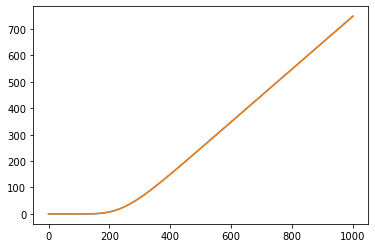

In [121]:
plt.plot(S,C2[0,:])
plt.plot(S,C0exact)

In [122]:
max(abs(C2[0,:]-C0exact))

0.04690248187482737

In [114]:
C2

array([[  0.        ,          nan,          nan, ...,          nan,
                 nan, 748.26299256],
       [  0.        ,          nan,          nan, ...,          nan,
                 nan, 748.2612304 ],
       [  0.        ,          nan,          nan, ...,          nan,
                 nan, 748.25946822],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 728.01377985,
        729.01377982, 730.01377983],
       [  0.        ,   0.        ,   0.        , ..., 728.01188993,
        729.01188993, 730.01188992],
       [  0.        ,   0.        ,   0.        , ..., 728.01      ,
        729.01      , 730.01      ]])